# **1. 앙상블(Ensemble)**

**머신러닝 앙상블이란 여러 개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법**
* 여러 모델을 이용하여 데이터를 학습하고, 모든 모델의 예측 결과를 평균하여 예측하는 방식


### **1-1. 앙상블 기법의 종류**
* 보팅(Voting): 투표를 통해 결과를 도출하는 기법
* 배깅(Bagging); 샘플 중복 생성을 통해 결과 도출
* 부스팅(Boosting): 이전 오차를 보완하면서 가중치를 부여
* 스태킹(Stacking): 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한 번 예측

# **2. 보팅(Voting)**
* Voting은 다른 알고리즘 model을 조합해서 사용
* hard vote; 결과물에 대한 최종 값을 투표해서 결정함
* soft vote: 최종 결과물이 나올 확률 값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최종 값을 도출


In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image
np.set_printoptions(suppress = True)

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df = pd.DataFrame(data['data'],columns = data['feature_names'])

In [ ]:
df['MEDV'] = data['target']

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV',1),df['MEDV'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [ ]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
425,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39
139,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46
464,7.83932,0.0,18.10,0.0,0.655,6.209,65.4,2.9634,24.0,666.0,20.2,396.90,13.22
243,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19


In [ ]:
y_train.head()

192    36.4
425     8.3
139    17.8
464    21.4
243    23.7
Name: MEDV, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

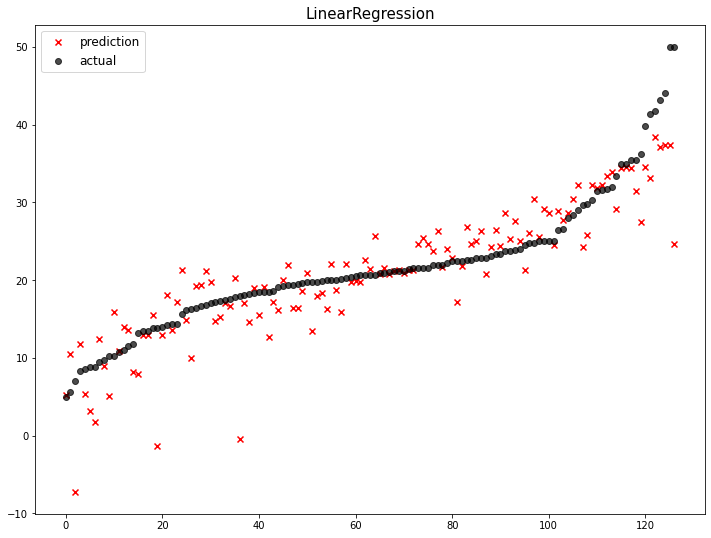

              model        mse
0  LinearRegression  22.337921


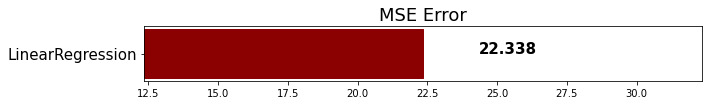

In [ ]:
linear_reg = LinearRegression(n_jobs=-1) # CPU를 모두 사용해라!
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

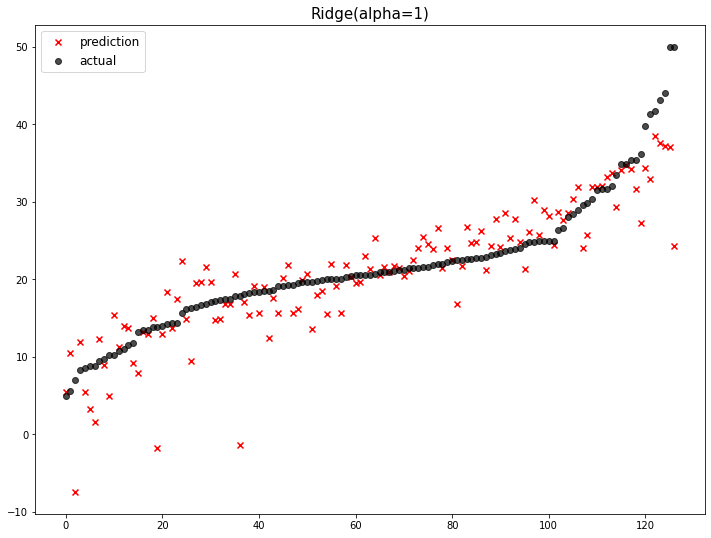

              model        mse
0    Ridge(alpha=1)  23.122048
1  LinearRegression  22.337921


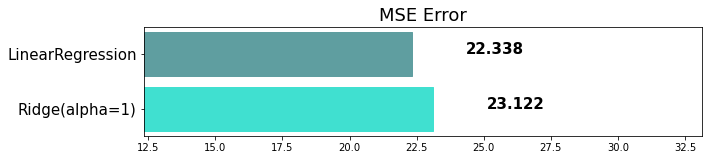

In [ ]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

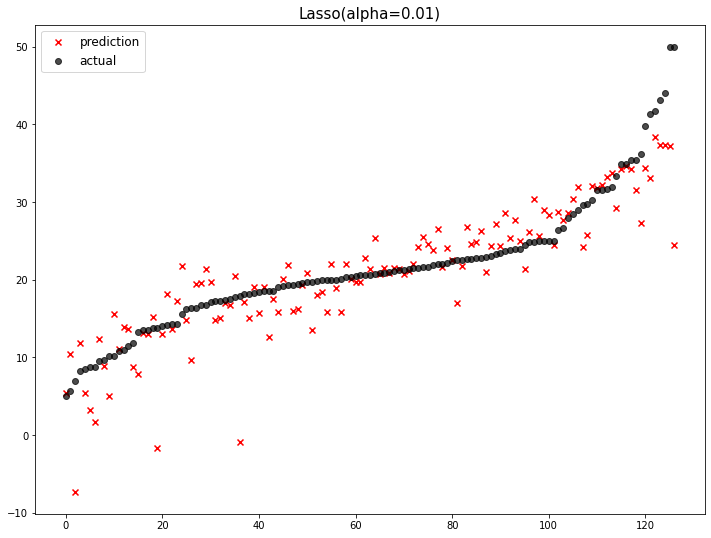

               model        mse
0     Ridge(alpha=1)  23.122048
1  Lasso(alpha=0.01)  22.699747
2   LinearRegression  22.337921


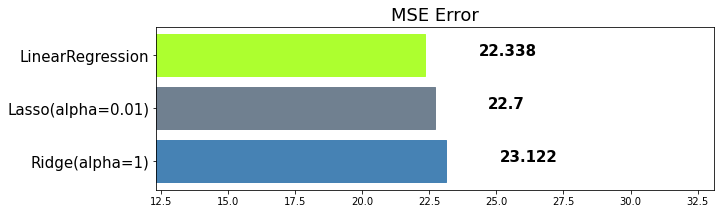

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

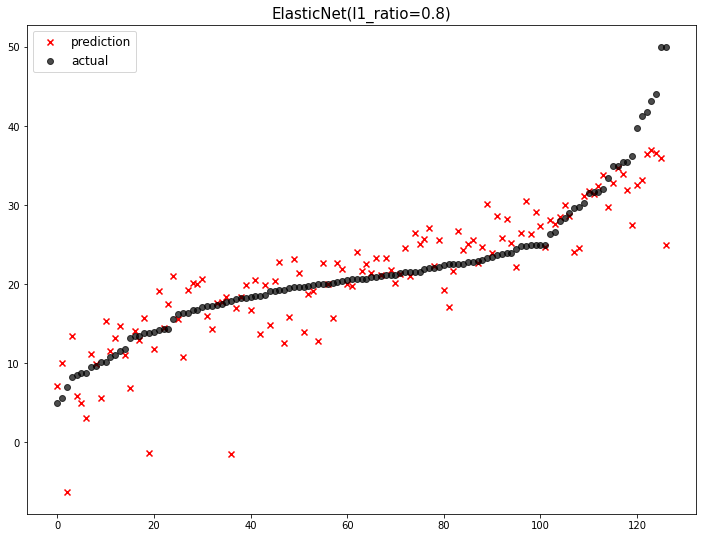

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.716409
1            Ridge(alpha=1)  23.122048
2         Lasso(alpha=0.01)  22.699747
3          LinearRegression  22.337921


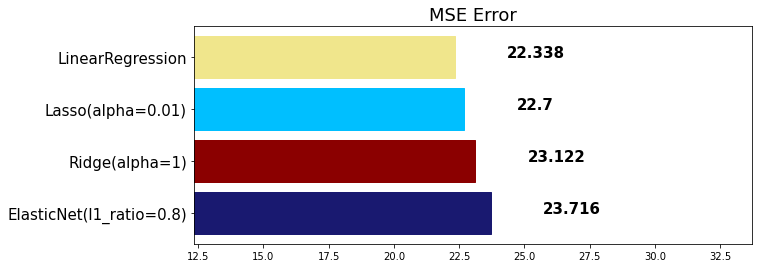

In [ ]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.8)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.8)', pred, y_test)

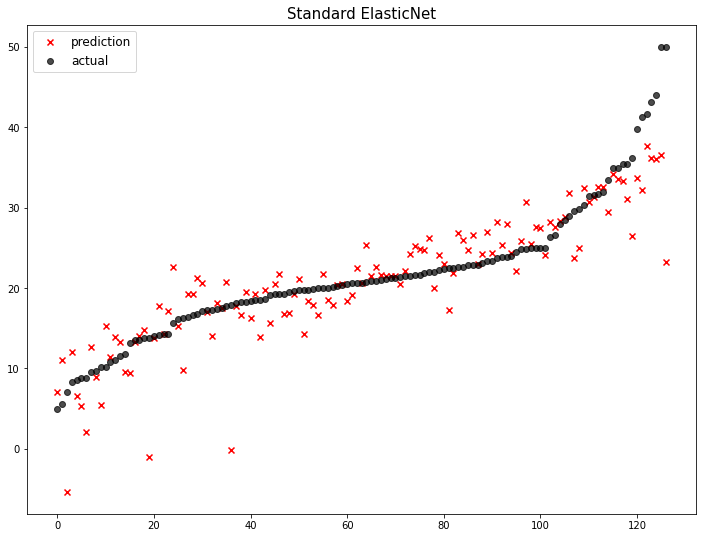

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.716409
1            Ridge(alpha=1)  23.122048
2         Lasso(alpha=0.01)  22.699747
3       Standard ElasticNet  22.382817
4          LinearRegression  22.337921


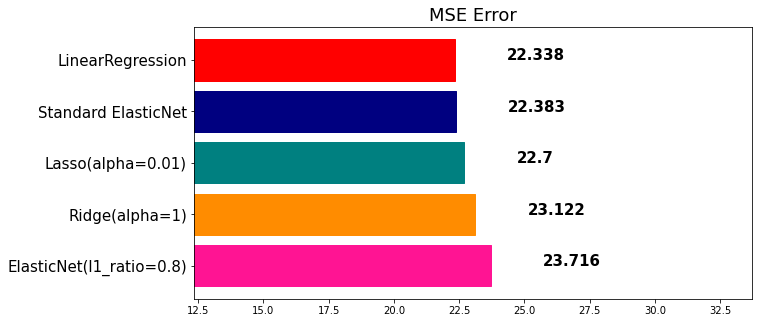

In [ ]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.371e+01, tolerance: 3.351e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


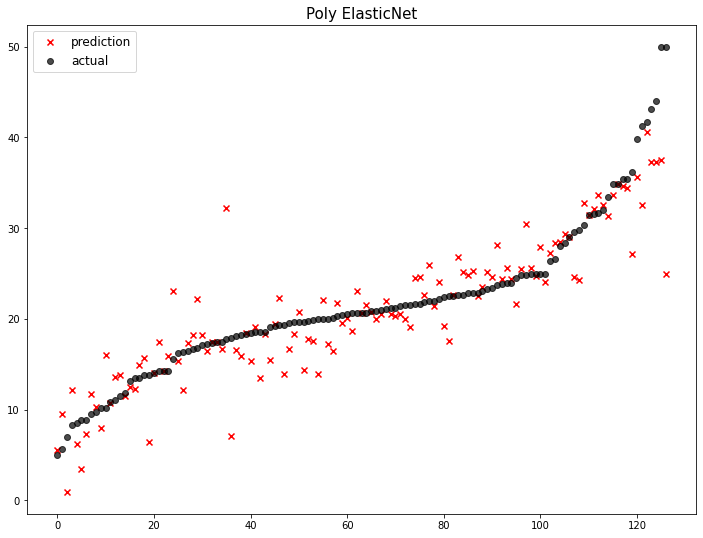

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.716409
1            Ridge(alpha=1)  23.122048
2         Lasso(alpha=0.01)  22.699747
3       Standard ElasticNet  22.382817
4          LinearRegression  22.337921
5           Poly ElasticNet  17.332256


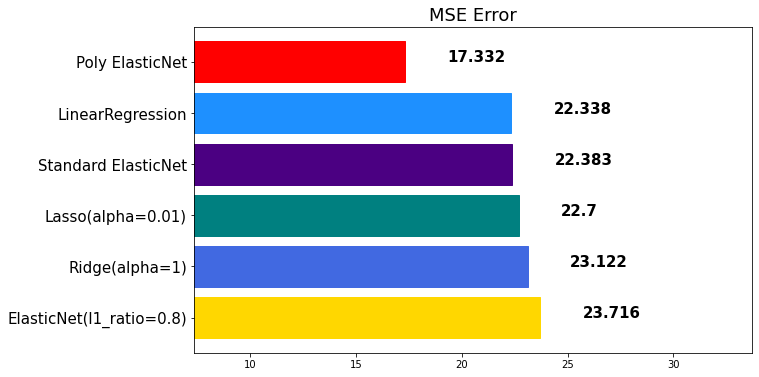

In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

In [ ]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [ ]:
# tuple 형태로 모델을 반드시 정의해야 함
single_models = [
  ('linear_reg',linear_reg), # (속성,값)
  ('ridge',ridge),
  ('lasso',lasso),
  ('elasticnet_pipeline',elasticnet_pipeline),
  ('poly_pipeline',poly_pipeline)
]

In [ ]:
voting_regressor = VotingRegressor(single_models,n_jobs = -1)
voting_regressor.fit(x_train,y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                       

In [ ]:
voting_pred = voting_regressor.predict(x_test)

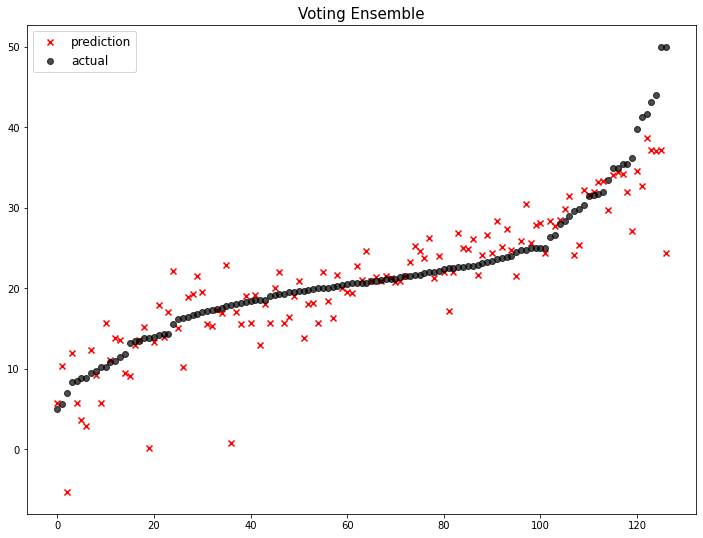

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.716409
1            Ridge(alpha=1)  23.122048
2         Lasso(alpha=0.01)  22.699747
3       Standard ElasticNet  22.382817
4          LinearRegression  22.337921
5           Voting Ensemble  20.735296
6           Poly ElasticNet  17.332256


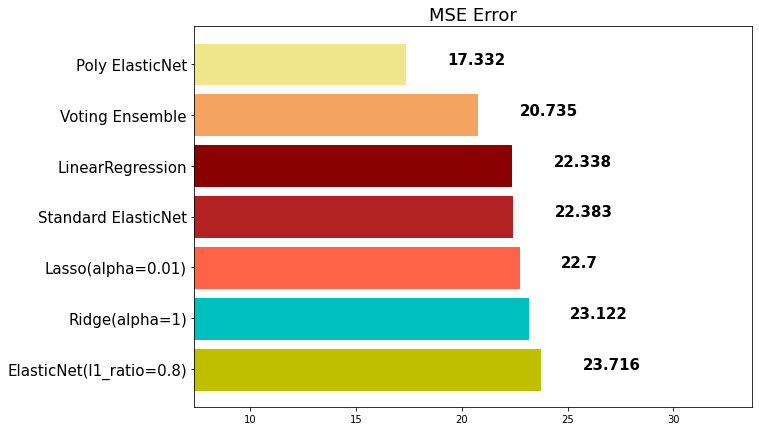

In [ ]:
mse_eval('Voting Ensemble',voting_pred,y_test)

### **2-1. 보팅(Voting) - 분류(classification)**


분류기 모델을 만들 때, Voting 앙상블은 1가지의 중요한 parameter가 있음
- voting = {'hard','soft'}
- hard : class를 0과 1으로 분류/예측하는 이진 분류를 사용하며, Hard Voting 방식에서는 결과값에 대한 다수 class를 사용함  
=> 분류를 예측한 값이 1,0,0,1,1 이라면 1이 3표, 0이 2표이기 때문에 Hard Voting 방식에서는 1이 최종값으로 예측됨  
(다중 분류 시에도 사용은 할 수 있음)
- soft: 각각의 확률의 평균 값을 계산한 다음 가장 확률이 높은 값으로 확정짓는 방식  
=> class 0이 나올 확률이 0.4,0.9,0.9,0.4,0.4)이었고, class 1이 나올 확률이 (0.6,0.1,0.1,0.6,0.6)이였다면 class 0이 나올 확률은 (0.4+0.9+0.9+0.4+0.4)/5 = 0.6이고, class 1이 나올 확률은 (0.6+0.1+0.1+0.6+0.6)/5 = 0.4이기 때문에 class 0이 최종 값으로 예측된다.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [ ]:
models = [
          ('Logi',LogisticRegression()),
          ('ridge',RidgeClassifier)
]

In [ ]:
vc = VotingClassifier(models,voting = "hard")

# **3. 배깅(Bagging)**
* Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용
* Bagging은 Bootstrap Aggregating의 줄임말
* Bootstrap은 여러 개의 dataset의 중첩을 허용하여 샘플링해서 분할하는 방식
* 데이터 셋의 구성이[1,2,3,4,5]로 되어 있다면,
  - 1. group 1 = [1,2,3],
  - 2. group 2 = [1,3,4],
  - 3. group 3 = [2,3,5]

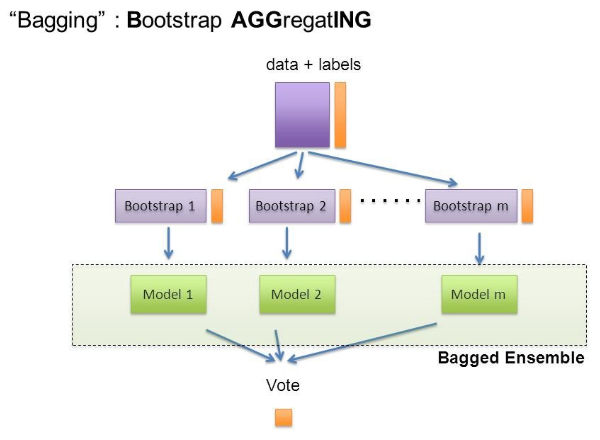

In [ ]:
Image('https://teddylee777.github.io/images/2019-12-17/image-20191217015537872.png')

### **3-1. Voting과 Bagging**
* Voting은 여러 알고리즘의 조합에 대한 앙상블
* Bagging은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블
* 대표적인 Bagging 앙상블 알고리즘
  - RandomForest
  - Bagging
  

### **3-2. RandomForest**
* DecisionTree(트리) 기반 Bagging 앙상블
* 앙상블 모델 중 굉장히 인기있음
* 사용성이 쉽고, 성능도 우수함

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
'''
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
'''

"\nRandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',\n                      max_depth=None, max_features='auto', max_leaf_nodes=None,\n                      max_samples=None, min_impurity_decrease=0.0,\n                      min_impurity_split=None, min_samples_leaf=1,\n                      min_samples_split=2, min_weight_fraction_leaf=0.0,\n                      n_estimators=100, n_jobs=None, oob_score=False,\n                      random_state=None, verbose=0, warm_start=False)\n"

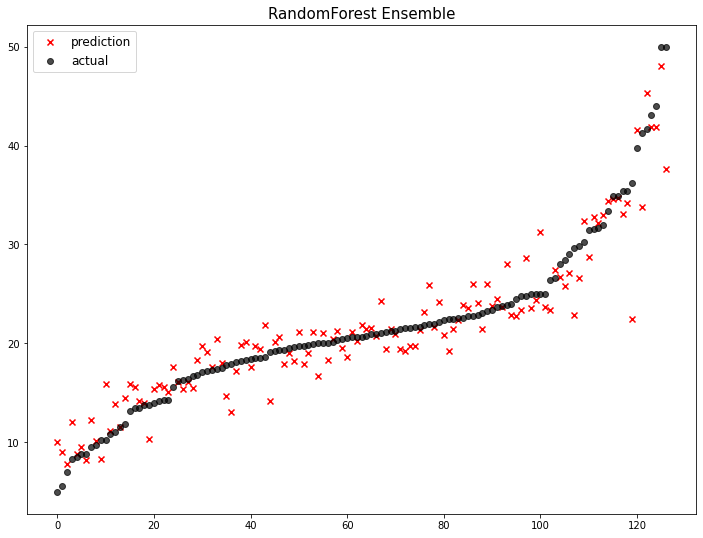

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.716409
1            Ridge(alpha=1)  23.122048
2         Lasso(alpha=0.01)  22.699747
3       Standard ElasticNet  22.382817
4          LinearRegression  22.337921
5           Voting Ensemble  20.735296
6           Poly ElasticNet  17.332256
7     RandomForest Ensemble   7.738067


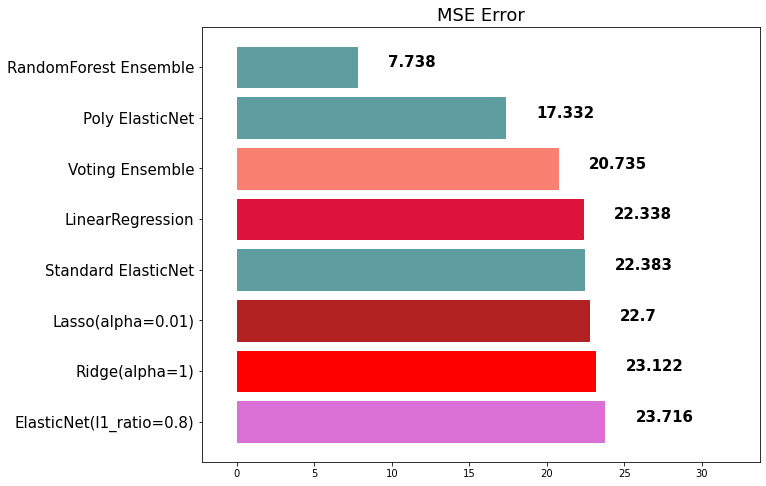

In [ ]:
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble', rfr_pred, y_test)

* random_state: 랜덤 시드 고정 값, 고정해두고 튜닝
* max_depth: 깊어질 수 있는 최대 깊이, 과대적합 방지용
* n_estimators: 앙상블하는 트리의 개수
* max_features: 최대로 사용할 feature의 개수
* min_samples_split: 트리가 분할할 때 최소 샘플의 개수, default = 2, 과대적합 방지용
> 튜닝을 할 때는 반드시 random_state를 고정!

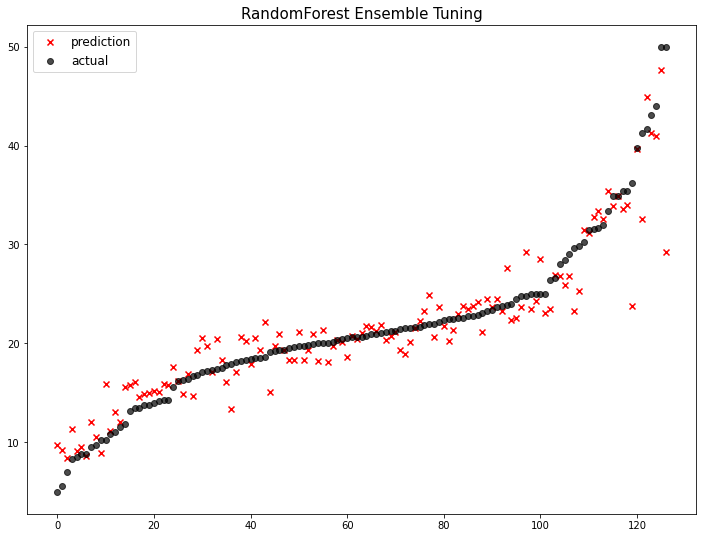

                          model        mse
0      ElasticNet(l1_ratio=0.8)  23.716409
1                Ridge(alpha=1)  23.122048
2             Lasso(alpha=0.01)  22.699747
3           Standard ElasticNet  22.382817
4              LinearRegression  22.337921
5               Voting Ensemble  20.735296
6               Poly ElasticNet  17.332256
7  RandomForest Ensemble Tuning   9.157556
8         RandomForest Ensemble   7.738067


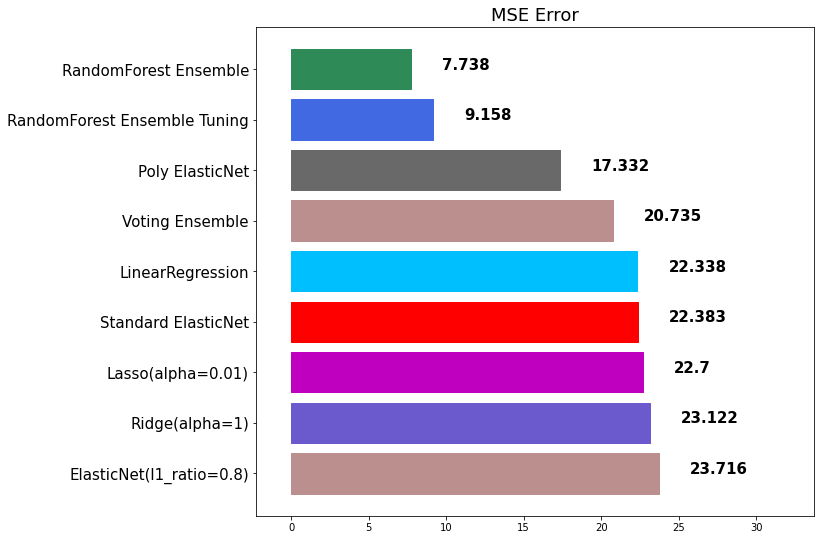

In [ ]:
rfr = RandomForestRegressor(random_state = 42,n_estimators = 1000,max_depth = 9, max_features = 0.4)
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble Tuning',rfr_pred,y_test)

# **4. 부스팅(Boosting)**
* 약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식
* 장점: 성능이 매우 우수함(Lgbm, XGBoost)
* 단점: 부스팅 알고리즘의 특성상 계속 약점을 보완하려고 하기 때문에 잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감할 수 있음.  
다른 앙상블 대비 학습 시간이 오래 걸림


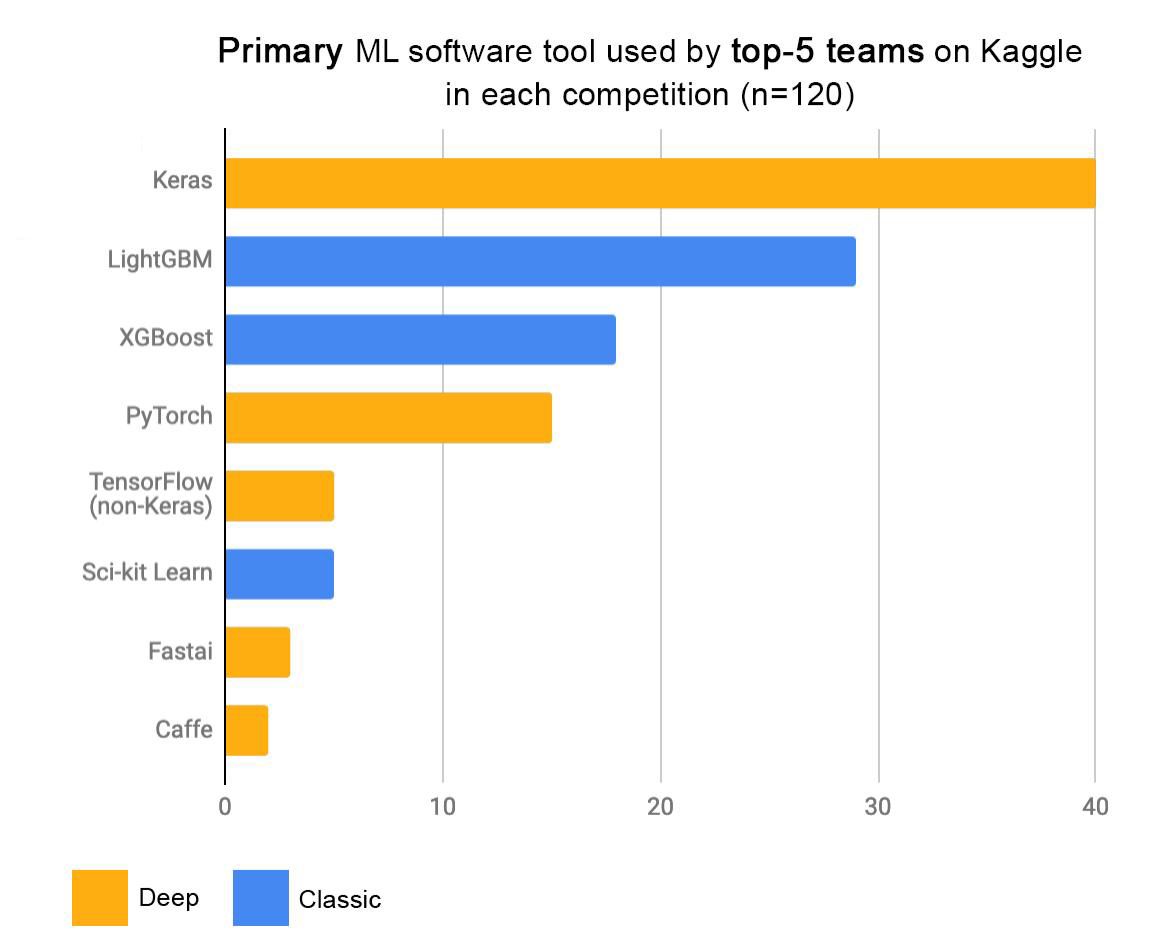

In [ ]:
Image('https://keras.io/img/graph-kaggle-1.jpeg', width=800)

### **4-1. 대표적인 Boosting 앙상블**
1. AdaBoost
2. GradientBoost
3. LightGBM(LGBM)
4. XGBoost


### **GradientBoost**
* 성능이 우수함
* 학습시간이 너무너무너무 느림(속터짐..)
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=gradient%20boost#sklearn.ensemble.GradientBoostingRegressor


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

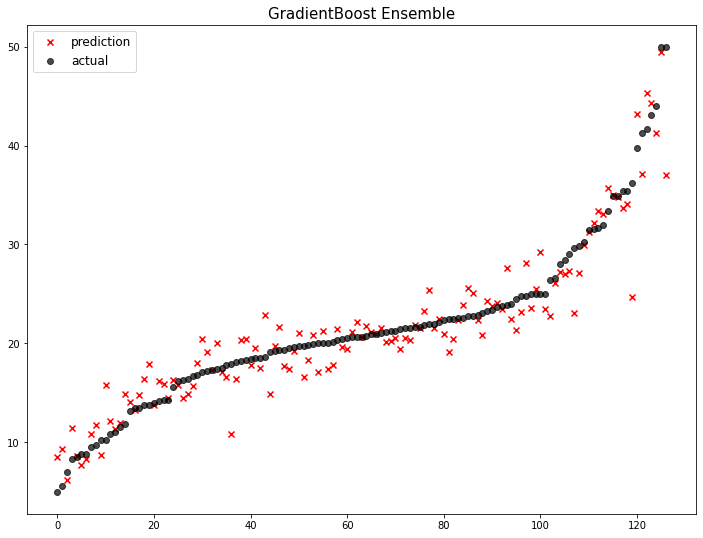

                          model        mse
0      ElasticNet(l1_ratio=0.8)  23.716409
1                Ridge(alpha=1)  23.122048
2             Lasso(alpha=0.01)  22.699747
3           Standard ElasticNet  22.382817
4              LinearRegression  22.337921
5               Voting Ensemble  20.735296
6               Poly ElasticNet  17.332256
7  RandomForest Ensemble Tuning   9.157556
8         RandomForest Ensemble   7.738067
9        GradientBoost Ensemble   6.852837


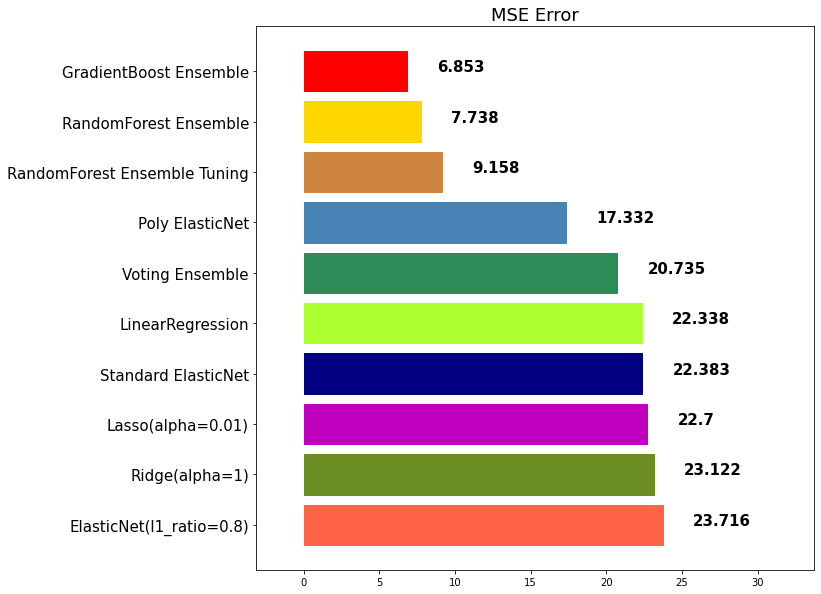

In [ ]:
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble',gbr_pred,y_test)

* learning_rate: 학습율/ 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. => 적절한 값을 찾아야 함
* default = 0.1
* subsample: 샘플 사용 비율(max_feature와 비슷한 개념), 과대적합 방지용
* min_samples_split: 노드 분할 시 최소 샘플의 개수, default = 2, 과대적합 방지용


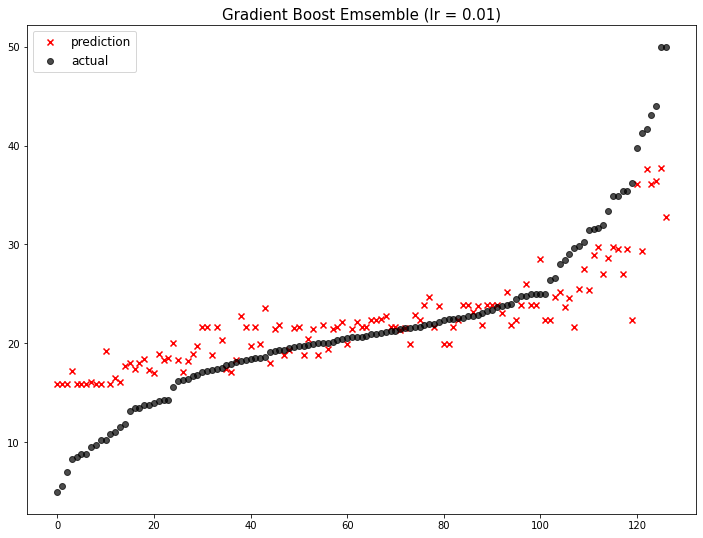

                                  model        mse
0              ElasticNet(l1_ratio=0.8)  23.716409
1                        Ridge(alpha=1)  23.122048
2                     Lasso(alpha=0.01)  22.699747
3                   Standard ElasticNet  22.382817
4                      LinearRegression  22.337921
5   Gradient Boost Emsemble (lr = 0.01)  20.791161
6                       Voting Ensemble  20.735296
7                       Poly ElasticNet  17.332256
8          RandomForest Ensemble Tuning   9.157556
9                 RandomForest Ensemble   7.738067
10               GradientBoost Ensemble   6.852837


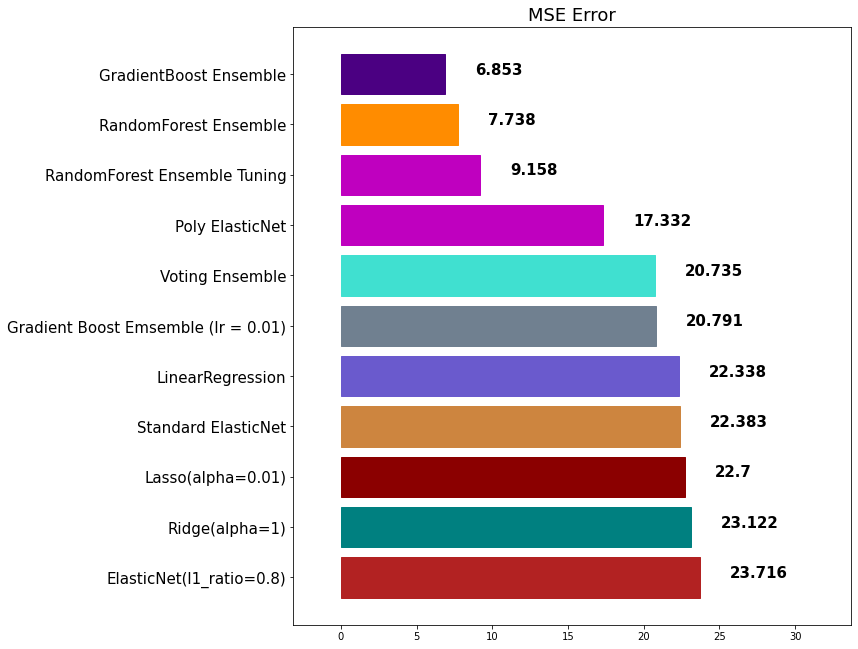

In [ ]:
gbr = GradientBoostingRegressor(random_state = 42,learning_rate=0.01)
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('Gradient Boost Emsemble (lr = 0.01)',gbr_pred,y_test)

### **XGBoost**
- scikitlearn 패키지가 아님
- 성능이 우수함
- GBM보다는 빠르고 성능도 향상됨
- 학습시간이 매우 느림

In [ ]:
from xgboost import XGBRegressor, XGBClassifier

[10:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


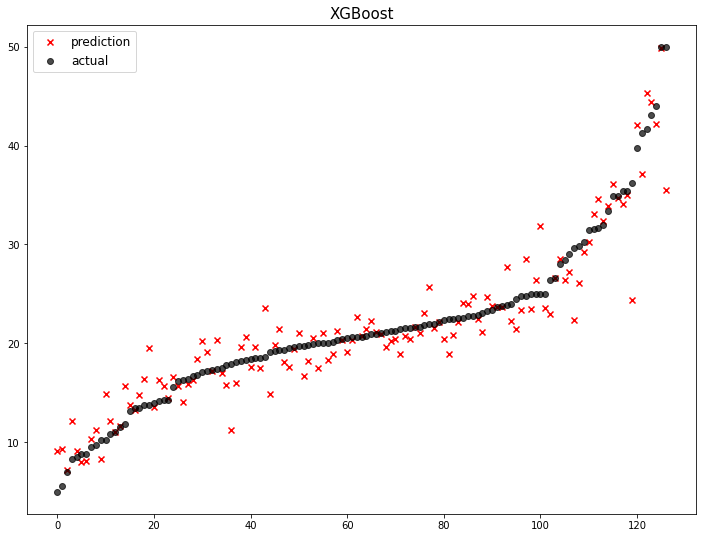

                                  model        mse
0              ElasticNet(l1_ratio=0.8)  23.716409
1                        Ridge(alpha=1)  23.122048
2                     Lasso(alpha=0.01)  22.699747
3                   Standard ElasticNet  22.382817
4                      LinearRegression  22.337921
5   Gradient Boost Emsemble (lr = 0.01)  20.791161
6                       Voting Ensemble  20.735296
7                       Poly ElasticNet  17.332256
8          RandomForest Ensemble Tuning   9.157556
9                 RandomForest Ensemble   7.738067
10                              XGBoost   7.667770
11               GradientBoost Ensemble   6.852837


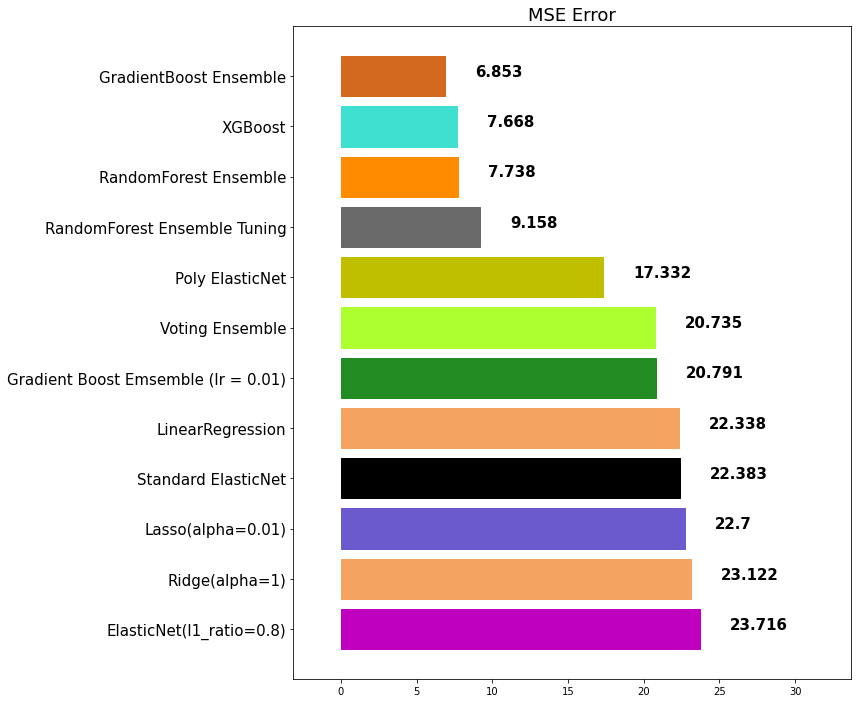

In [ ]:
XGBRegressor, XGBClassifier
xgb = XGBRegressor(random_state=42) # 랜덤 시드값 고정 -> 데이터 변동 방지
xgb.fit(x_train, y_train) # 모델 학습시키기
xgb_pred = xgb.predict(x_test) # 예측하기
mse_eval('XGBoost', xgb_pred, y_test) # 결과 확인하기

### **LightGBM**
- scikitlearn 패키지가 아님
- 성능이 우수함
- 속도도 매우 빠름


In [ ]:
from lightgbm import LGBMRegressor, LGBMClassifier

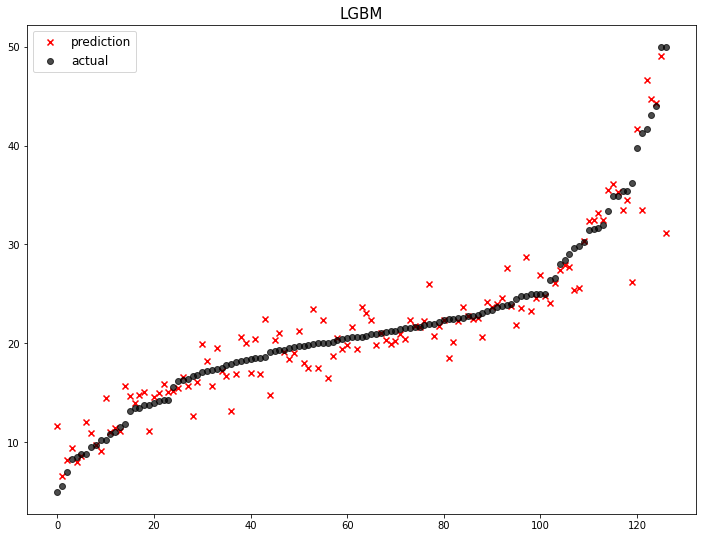

                                  model        mse
0              ElasticNet(l1_ratio=0.8)  23.716409
1                        Ridge(alpha=1)  23.122048
2                     Lasso(alpha=0.01)  22.699747
3                   Standard ElasticNet  22.382817
4                      LinearRegression  22.337921
5   Gradient Boost Emsemble (lr = 0.01)  20.791161
6                       Voting Ensemble  20.735296
7                       Poly ElasticNet  17.332256
8          RandomForest Ensemble Tuning   9.157556
9                                  LGBM   7.912703
10                RandomForest Ensemble   7.738067
11                              XGBoost   7.667770
12               GradientBoost Ensemble   6.852837


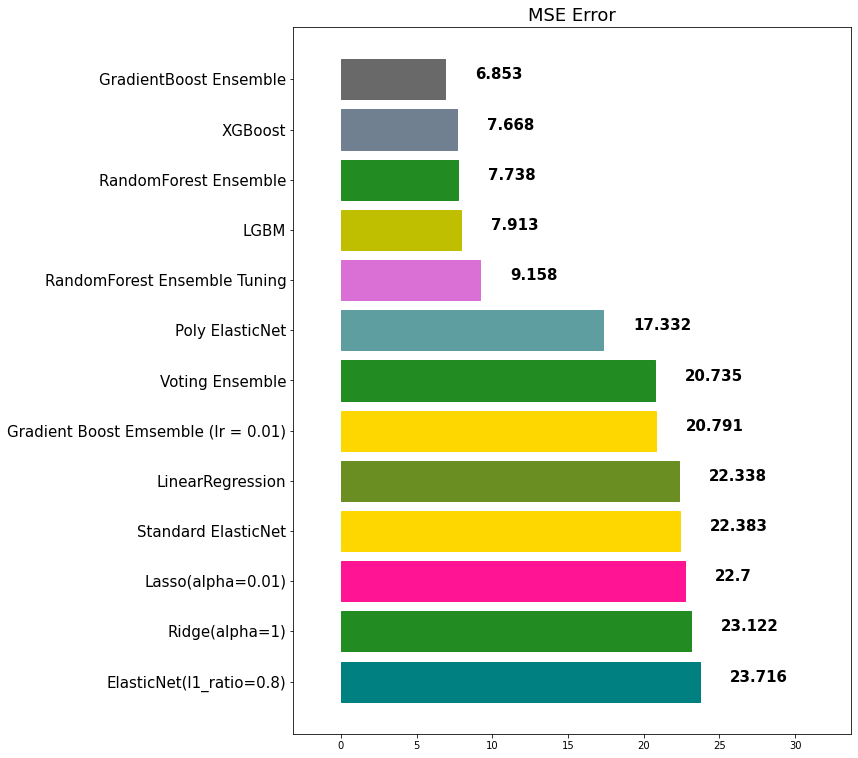

In [ ]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM', lgbm_pred, y_test)